In [1]:
from huggingface_hub import snapshot_download
snapshot_download("deepcs233/VisCoT-7b-224")

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.15G [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

trainer_state.json:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/6.20k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/76.0k [00:00<?, ?B/s]

'/home/roborobo/.cache/huggingface/hub/models--deepcs233--VisCoT-7b-224/snapshots/709b681484a91ed9c6b6afab5a55238782baf2f0'

In [1]:
from transformers import Owlv2Processor, Owlv2ForObjectDetection

processor = Owlv2Processor.from_pretrained("google/owlv2-base-patch16-ensemble")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-base-patch16-ensemble")

2024-03-27 18:53:31.855697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 18:53:32.360668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import torch
from PIL import Image
import requests
from transformers import SamModel, SamProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SamModel.from_pretrained("facebook/sam-vit-huge").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

img_url = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
input_points = [[[450, 600]]]  # 2D location of a window in the image

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

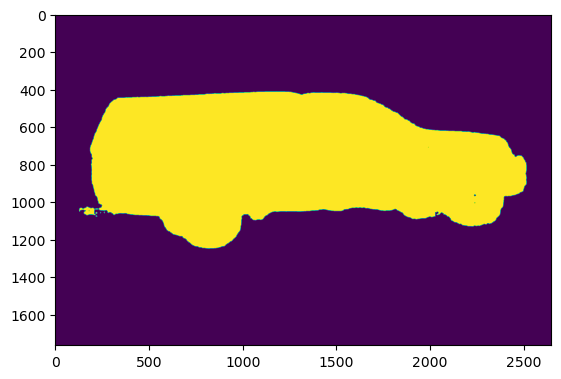

In [14]:
import matplotlib.pyplot as plt
import numpy as np
masks[0][0][0]
plt.imshow(masks[0][0][2].numpy()[:,:,np.newaxis])